c:\Users\JaehyeonShin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
23:23:08 - cmdstanpy - INFO - Chain [1] start processing
23:23:08 - cmdstanpy - INFO - Chain [1] done processing


예측값 범위: 85878748236 ~ 90661715753


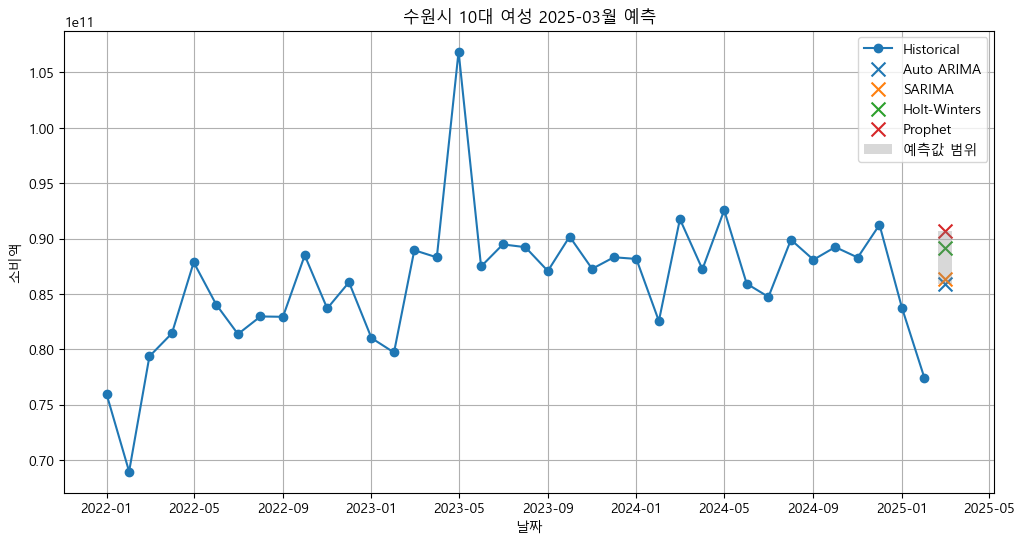

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from pmdarima import auto_arima
import warnings

warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('10대_여성_수원_월별_총소비액.csv')
df['date'] = pd.to_datetime(df[['year','month']].assign(day=1))
df.set_index('date', inplace=True)
series = df['total_amt'].rename('value')

horizon = 1
train = series.copy()

#Auto ARIMA
auto_model = auto_arima(train, seasonal=True, m=12, suppress_warnings=True, stepwise=True)
auto_pred = auto_model.predict(n_periods=horizon)[0]

#SARIMA
sarima_res = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12)).fit(disp=False)
sarima_pred = sarima_res.forecast(steps=horizon)[0]

#Holt-Winters
hw_res = ExponentialSmoothing(train, seasonal_periods=12, trend='add', seasonal='add').fit()
hw_pred = hw_res.forecast(horizon)[0]

#Prophet
prophet_df = train.reset_index().rename(columns={'date':'ds','value':'y'})
prophet = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
prophet.fit(prophet_df)
future = prophet.make_future_dataframe(periods=horizon, freq='MS')
prophet_pred = prophet.predict(future)['yhat'][-horizon:].values[0]

preds = {
    'Auto ARIMA': auto_pred,
    'SARIMA': sarima_pred,
    'Holt-Winters': hw_pred,
    'Prophet': prophet_pred
}

values = list(preds.values())
min_pred = np.min(values)
max_pred = np.max(values)

print(f"예측값 범위: {min_pred:.0f} ~ {max_pred:.0f}")

forecast_date = series.index[-1] + pd.offsets.MonthBegin(1)

plt.figure(figsize=(12,6))
plt.plot(series.index, series, marker='o', label='Historical')

for name, val in preds.items():
    plt.scatter(forecast_date, val, marker='x', s=100, label=name)

plt.bar(
    forecast_date,
    max_pred - min_pred,
    bottom=min_pred,
    width=20,
    color='gray',
    alpha=0.3,
    label='예측값 범위'
)

plt.title('수원시 10대 여성 2025-03월 예측')
plt.xlabel('날짜')
plt.ylabel('소비액')
plt.legend()
plt.grid(True)
plt.show()



23:25:28 - cmdstanpy - INFO - Chain [1] start processing
23:25:28 - cmdstanpy - INFO - Chain [1] done processing


다음 달 예측값 범위: 106222626189 ~ 111487848507


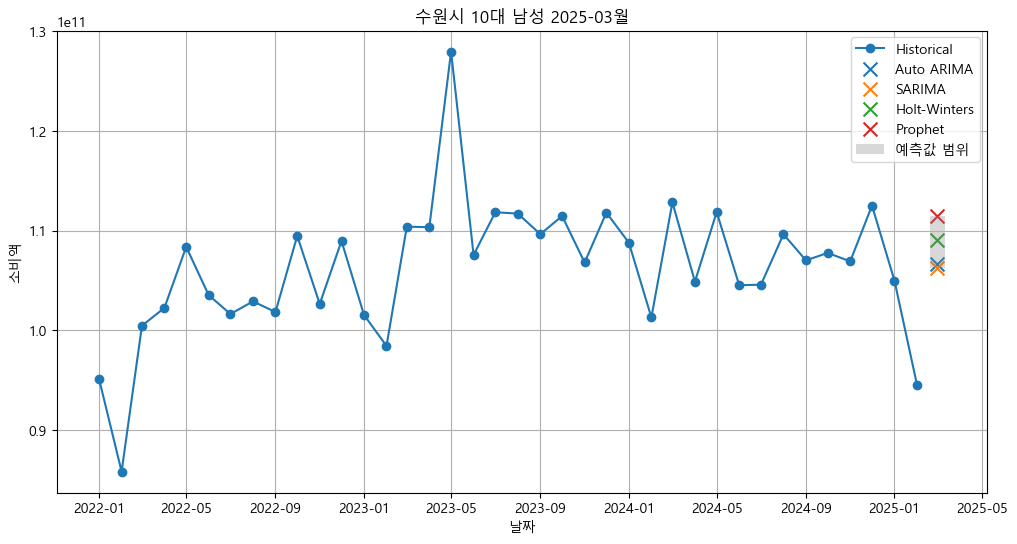

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from pmdarima import auto_arima
import warnings

warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('10대_남성_수원_월별_총소비액.csv')
df['date'] = pd.to_datetime(df[['year','month']].assign(day=1))
df.set_index('date', inplace=True)
series = df['total_amt'].rename('value')

horizon = 1
train = series.copy()

#Auto ARIMA
auto_model = auto_arima(train, seasonal=True, m=12, suppress_warnings=True, stepwise=True)
auto_pred = auto_model.predict(n_periods=horizon)[0]

#SARIMA
sarima_res = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12)).fit(disp=False)
sarima_pred = sarima_res.forecast(steps=horizon)[0]

#Holt-Winters
hw_res = ExponentialSmoothing(train, seasonal_periods=12, trend='add', seasonal='add').fit()
hw_pred = hw_res.forecast(horizon)[0]

#Prophet
prophet_df = train.reset_index().rename(columns={'date':'ds','value':'y'})
prophet = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
prophet.fit(prophet_df)
future = prophet.make_future_dataframe(periods=horizon, freq='MS')
prophet_pred = prophet.predict(future)['yhat'][-horizon:].values[0]

preds = {
    'Auto ARIMA': auto_pred,
    'SARIMA': sarima_pred,
    'Holt-Winters': hw_pred,
    'Prophet': prophet_pred
}

values = list(preds.values())
min_pred = np.min(values)
max_pred = np.max(values)

print(f"다음 달 예측값 범위: {min_pred:.0f} ~ {max_pred:.0f}")

forecast_date = series.index[-1] + pd.offsets.MonthBegin(1)

plt.figure(figsize=(12,6))
plt.plot(series.index, series, marker='o', label='Historical')

for name, val in preds.items():
    plt.scatter(forecast_date, val, marker='x', s=100, label=name)
plt.bar(
    forecast_date,
    max_pred - min_pred,
    bottom=min_pred,
    width=20,
    color='gray',
    alpha=0.3,
    label='예측값 범위'
)

plt.title('수원시 10대 남성 2025-03월')
plt.xlabel('날짜')
plt.ylabel('소비액')
plt.legend()
plt.grid(True)
plt.show()



23:26:23 - cmdstanpy - INFO - Chain [1] start processing
23:26:23 - cmdstanpy - INFO - Chain [1] done processing


다음 달 예측값 범위: 85878748236 ~ 90661715753


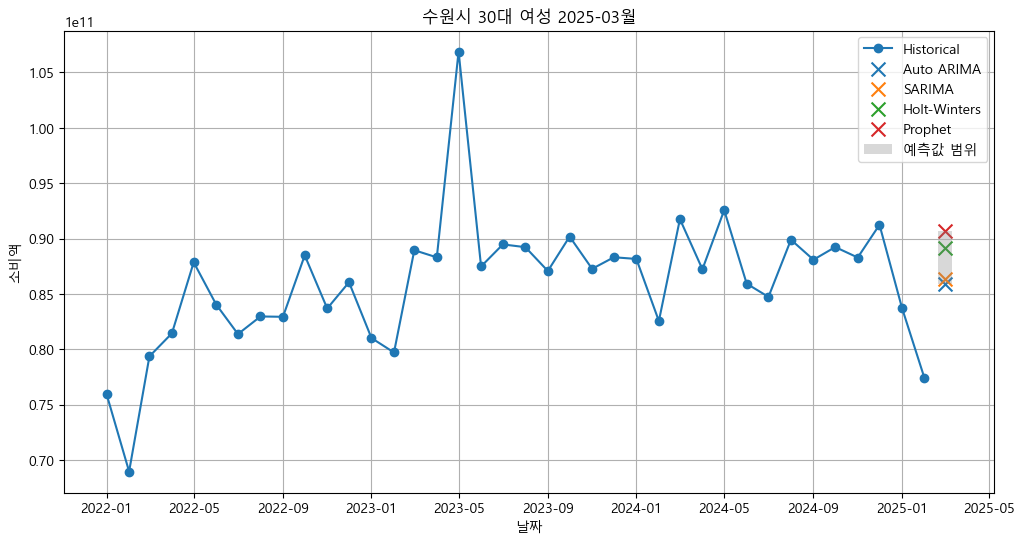

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from pmdarima import auto_arima
import warnings

warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('30대_여성_수원_월별_총소비액.csv')
df['date'] = pd.to_datetime(df[['year','month']].assign(day=1))
df.set_index('date', inplace=True)
series = df['total_amt'].rename('value')

horizon = 1
train = series.copy()

#Auto ARIMA
auto_model = auto_arima(train, seasonal=True, m=12, suppress_warnings=True, stepwise=True)
auto_pred = auto_model.predict(n_periods=horizon)[0]

#SARIMA
sarima_res = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12)).fit(disp=False)
sarima_pred = sarima_res.forecast(steps=horizon)[0]

#Holt-Winters
hw_res = ExponentialSmoothing(train, seasonal_periods=12, trend='add', seasonal='add').fit()
hw_pred = hw_res.forecast(horizon)[0]

#Prophet
prophet_df = train.reset_index().rename(columns={'date':'ds','value':'y'})
prophet = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
prophet.fit(prophet_df)
future = prophet.make_future_dataframe(periods=horizon, freq='MS')
prophet_pred = prophet.predict(future)['yhat'][-horizon:].values[0]

# 예측값 딕셔너리 생성 및 범위 계산
preds = {
    'Auto ARIMA': auto_pred,
    'SARIMA': sarima_pred,
    'Holt-Winters': hw_pred,
    'Prophet': prophet_pred
}

values = list(preds.values())
min_pred = np.min(values)
max_pred = np.max(values)

print(f"다음 달 예측값 범위: {min_pred:.0f} ~ {max_pred:.0f}")

forecast_date = series.index[-1] + pd.offsets.MonthBegin(1)

plt.figure(figsize=(12,6))
plt.plot(series.index, series, marker='o', label='Historical')

for name, val in preds.items():
    plt.scatter(forecast_date, val, marker='x', s=100, label=name)

plt.bar(
    forecast_date,
    max_pred - min_pred,
    bottom=min_pred,
    width=20,
    color='gray',
    alpha=0.3,
    label='예측값 범위'
)

plt.title('수원시 30대 여성 2025-03월')
plt.xlabel('날짜')
plt.ylabel('소비액')
plt.legend()
plt.grid(True)
plt.show()



23:27:37 - cmdstanpy - INFO - Chain [1] start processing
23:27:37 - cmdstanpy - INFO - Chain [1] done processing


다음 달 예측값 범위: 106222626189 ~ 111487848507


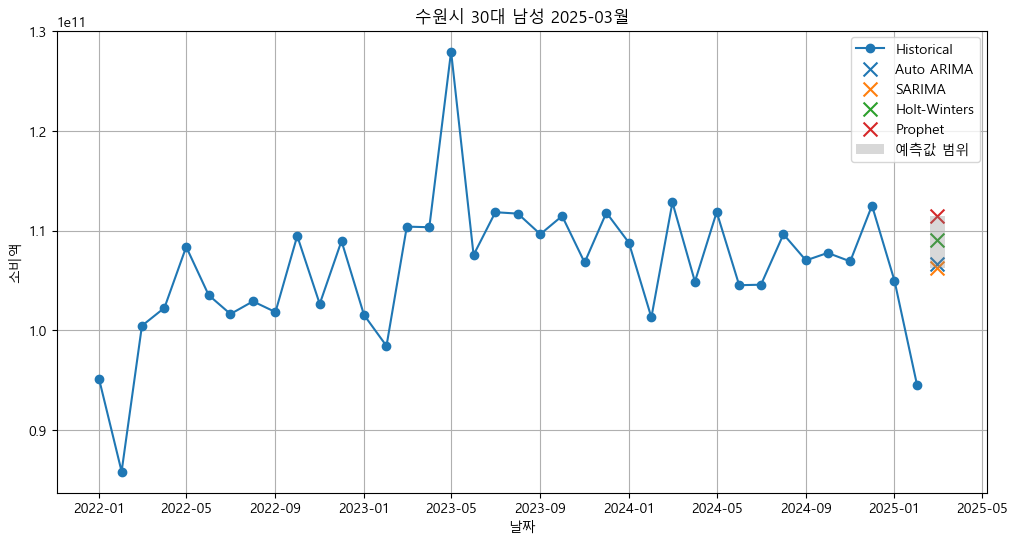

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from pmdarima import auto_arima
import warnings

warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('30대_남성_수원_월별_총소비액.csv')
df['date'] = pd.to_datetime(df[['year','month']].assign(day=1))
df.set_index('date', inplace=True)
series = df['total_amt'].rename('value')

horizon = 1
train = series.copy()

#Auto ARIMA
auto_model = auto_arima(train, seasonal=True, m=12, suppress_warnings=True, stepwise=True)
auto_pred = auto_model.predict(n_periods=horizon)[0]

#SARIMA
sarima_res = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12)).fit(disp=False)
sarima_pred = sarima_res.forecast(steps=horizon)[0]

#Holt-Winters
hw_res = ExponentialSmoothing(train, seasonal_periods=12, trend='add', seasonal='add').fit()
hw_pred = hw_res.forecast(horizon)[0]

#Prophet
prophet_df = train.reset_index().rename(columns={'date':'ds','value':'y'})
prophet = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
prophet.fit(prophet_df)
future = prophet.make_future_dataframe(periods=horizon, freq='MS')
prophet_pred = prophet.predict(future)['yhat'][-horizon:].values[0]

preds = {
    'Auto ARIMA': auto_pred,
    'SARIMA': sarima_pred,
    'Holt-Winters': hw_pred,
    'Prophet': prophet_pred
}

values = list(preds.values())
min_pred = np.min(values)
max_pred = np.max(values)

print(f"다음 달 예측값 범위: {min_pred:.0f} ~ {max_pred:.0f}")

forecast_date = series.index[-1] + pd.offsets.MonthBegin(1)

plt.figure(figsize=(12,6))
plt.plot(series.index, series, marker='o', label='Historical')

# 각 모델별 예측점
for name, val in preds.items():
    plt.scatter(forecast_date, val, marker='x', s=100, label=name)

plt.bar(
    forecast_date,
    max_pred - min_pred,
    bottom=min_pred,
    width=20,
    color='gray',
    alpha=0.3,
    label='예측값 범위'
)

plt.title('수원시 30대 남성 2025-03월')
plt.xlabel('날짜')
plt.ylabel('소비액')
plt.legend()
plt.grid(True)
plt.show()



23:28:19 - cmdstanpy - INFO - Chain [1] start processing
23:28:19 - cmdstanpy - INFO - Chain [1] done processing


다음 달 예측값 범위: 1114428 ~ 1155977


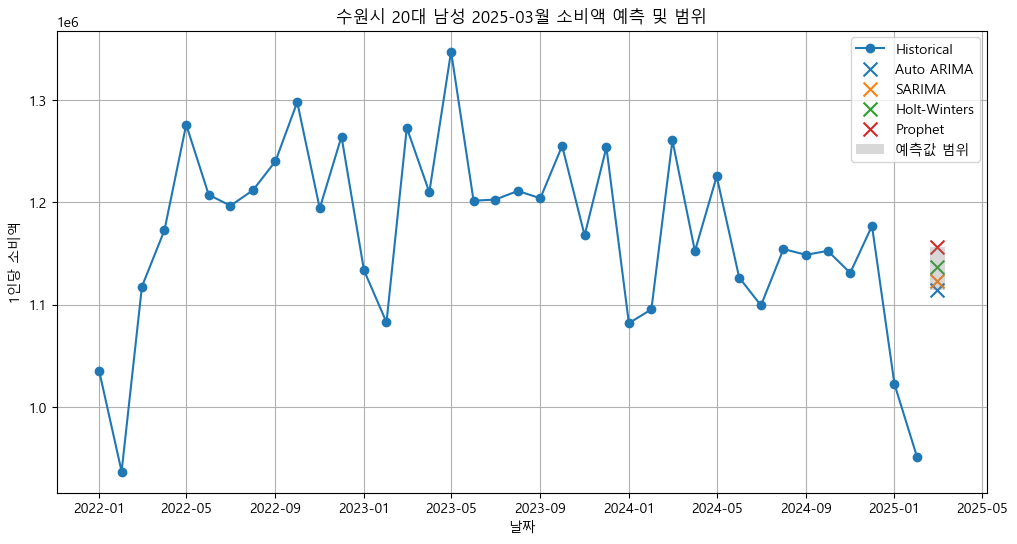

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from pmdarima import auto_arima
import warnings

warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('20대_남성_수원_월별_1인당_소비액.csv')
df['date'] = pd.to_datetime(df[['year','month']].assign(day=1))
df.set_index('date', inplace=True)
series = df[['adjusted_per_capita']].rename(columns={'adjusted_per_capita':'value'})

horizon = 1
train = series.copy()

#Auto ARIMA
auto_model = auto_arima(train, seasonal=True, m=12, suppress_warnings=True, stepwise=True)
auto_pred = auto_model.predict(n_periods=horizon)[0]

#SARIMA
sarima_res = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12)).fit(disp=False)
sarima_pred = sarima_res.forecast(steps=horizon)[0]

#Holt-Winters
hw_res = ExponentialSmoothing(train, seasonal_periods=12, trend='add', seasonal='add').fit()
hw_pred = hw_res.forecast(horizon)[0]

#Prophet
prophet_df = train.reset_index().rename(columns={'date':'ds','value':'y'})
prophet = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
prophet.fit(prophet_df)
future = prophet.make_future_dataframe(periods=horizon, freq='MS')
prophet_pred = prophet.predict(future)['yhat'][-horizon:].values[0]

preds = {
    'Auto ARIMA': auto_pred,
    'SARIMA': sarima_pred,
    'Holt-Winters': hw_pred,
    'Prophet': prophet_pred
}

values = list(preds.values())
min_pred = np.min(values)
max_pred = np.max(values)

print(f"다음 달 예측값 범위: {min_pred:.0f} ~ {max_pred:.0f}")

forecast_date = series.index[-1] + pd.offsets.MonthBegin(1)

plt.figure(figsize=(12,6))
plt.plot(series.index, series, marker='o', label='Historical')

for name, val in preds.items():
    plt.scatter(forecast_date, val, marker='x', s=100, label=name)

plt.bar(
    forecast_date,
    max_pred - min_pred,
    bottom=min_pred,
    width=20,
    color='gray',
    alpha=0.3,
    label='예측값 범위'
)

plt.title('수원시 20대 남성 2025-03월 소비액 예측 및 범위')
plt.xlabel('날짜')
plt.ylabel('1인당 소비액')
plt.legend()
plt.grid(True)
plt.show()



23:28:55 - cmdstanpy - INFO - Chain [1] start processing
23:28:55 - cmdstanpy - INFO - Chain [1] done processing


다음 달 예측값 범위: 929214 ~ 954480


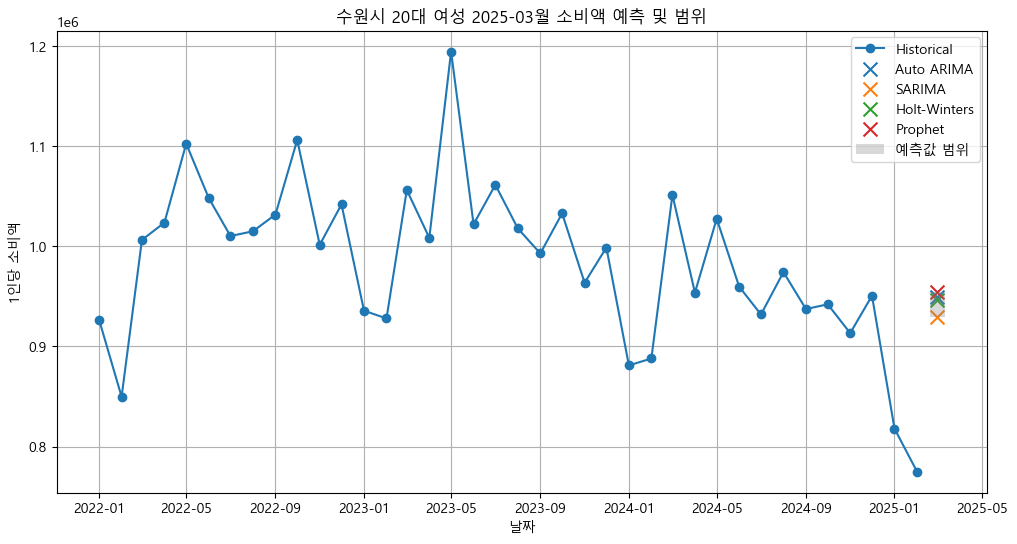

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from pmdarima import auto_arima
import warnings

warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('20대_여성_수원_월별_1인당_소비액.csv')
df['date'] = pd.to_datetime(df[['year','month']].assign(day=1))
df.set_index('date', inplace=True)
series = df[['adjusted_per_capita']].rename(columns={'adjusted_per_capita':'value'})

horizon = 1
train = series.copy()

#Auto ARIMA
auto_model = auto_arima(train, seasonal=True, m=12, suppress_warnings=True, stepwise=True)
auto_pred = auto_model.predict(n_periods=horizon)[0]

#SARIMA
sarima_res = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12)).fit(disp=False)
sarima_pred = sarima_res.forecast(steps=horizon)[0]

#Holt-Winters
hw_res = ExponentialSmoothing(train, seasonal_periods=12, trend='add', seasonal='add').fit()
hw_pred = hw_res.forecast(horizon)[0]

#Prophet
prophet_df = train.reset_index().rename(columns={'date':'ds','value':'y'})
prophet = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
prophet.fit(prophet_df)
future = prophet.make_future_dataframe(periods=horizon, freq='MS')
prophet_pred = prophet.predict(future)['yhat'][-horizon:].values[0]

preds = {
    'Auto ARIMA': auto_pred,
    'SARIMA': sarima_pred,
    'Holt-Winters': hw_pred,
    'Prophet': prophet_pred
}

values = list(preds.values())
min_pred = np.min(values)
max_pred = np.max(values)

print(f"다음 달 예측값 범위: {min_pred:.0f} ~ {max_pred:.0f}")

forecast_date = series.index[-1] + pd.offsets.MonthBegin(1)

plt.figure(figsize=(12,6))
plt.plot(series.index, series, marker='o', label='Historical')

for name, val in preds.items():
    plt.scatter(forecast_date, val, marker='x', s=100, label=name)

plt.bar(
    forecast_date,
    max_pred - min_pred,
    bottom=min_pred,
    width=20,
    color='gray',
    alpha=0.3,
    label='예측값 범위'
)

plt.title('수원시 20대 여성 2025-03월 소비액 예측 및 범위')
plt.xlabel('날짜')
plt.ylabel('1인당 소비액')
plt.legend()
plt.grid(True)
plt.show()

